In [3]:
import pandas as pd
import numpy as np


In [2]:
X = pd.read_csv("data/samples.csv")

In [3]:
Y = pd.read_csv("data/targets_linreg.csv")

In [4]:
X.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.0,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.0,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.0,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.0,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.0,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
Y.head()

,таргет2
0,625.0
1,22.0
2,35.0
3,145.0
4,387.0


In [8]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=15)

model.fit(X, Y)

Lasso(alpha=15)

In [9]:
model.coef_

array([ 9.94488303e-01,  4.65030291e-04,  8.45131273e+01,  8.48336361e+02,
       -0.00000000e+00, -0.00000000e+00,  6.60985921e+02, -0.00000000e+00,
       -0.00000000e+00,  2.03561359e+03, -0.00000000e+00, -0.00000000e+00,
       -9.99936018e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.36520149e+03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        9.13696222e+01, -2.59230184e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

## Метод обёртки

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=10)

sfs.fit(X, Y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)

In [11]:
sfs.get_feature_names_out()

array(['Категория', 'Цель в долларах', 'Год публикации', 'Close_brent',
       'GBP', 'JPY', 'MXN', 'SGD', 'USD', 'Crafts'], dtype=object)

### Метод обратного отбора

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=27, direction='backward')

sfs.fit(X, Y)

## Методы фильтрации

In [7]:
### матрица корреляции

pd.concat((X, Y), axis =1).corr()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater,таргет2
Категория,1.000000,0.005367,-0.002476,0.139622,-0.000953,0.025261,0.014993,0.008114,0.064460,0.007239,...,-0.074223,-0.120246,-0.095730,-0.063836,-0.190489,-0.086241,-0.176827,0.343178,-0.085420,0.125832
Цель в долларах,0.005367,1.000000,0.021607,0.012320,-0.000066,0.000584,0.010613,-0.000962,0.005738,-0.000631,...,-0.004456,0.014136,0.001602,0.002902,-0.009798,-0.004757,-0.007476,0.015200,-0.002958,0.006354
Срок,-0.002476,0.021607,1.000000,-0.171189,-0.000562,-0.000709,0.004746,-0.003698,0.012850,-0.054041,...,-0.026564,0.037582,-0.001235,0.002608,0.042324,-0.006003,-0.006150,0.030692,-0.009011,0.008651
Год публикации,0.139622,0.012320,-0.171189,1.000000,0.002280,0.096694,0.044651,0.040027,0.190483,0.118493,...,0.073451,-0.159839,0.050954,0.021174,-0.142469,-0.022634,-0.005267,0.135133,-0.065796,0.025158
Close_brent,-0.000953,-0.000066,-0.000562,0.002280,1.000000,-0.000476,-0.000107,-0.000128,0.004390,-0.000756,...,0.005389,-0.001097,-0.000646,-0.000272,-0.000970,-0.000420,0.002396,-0.000721,-0.000432,-0.000232
CAD,0.025261,0.000584,-0.000709,0.096694,-0.000476,1.000000,-0.008737,-0.010434,-0.041907,-0.061484,...,0.010157,-0.026192,0.004543,0.004179,-0.031147,-0.001653,0.000542,0.031432,-0.018772,-0.006109
CHF,0.014993,0.010613,0.004746,0.044651,-0.000107,-0.008737,1.000000,-0.002352,-0.009447,-0.013861,...,0.004923,-0.012151,-0.000097,-0.002545,-0.008734,-0.002848,-0.008081,0.027563,-0.005955,0.004157
DKK,0.008114,-0.000962,-0.003698,0.040027,-0.000128,-0.010434,-0.002352,1.000000,-0.011282,-0.016552,...,0.003038,-0.009153,-0.002467,0.003788,-0.006061,-0.002079,-0.004853,0.016308,-0.003195,-0.001237
EUR,0.064460,0.005738,0.012850,0.190483,0.004390,-0.041907,-0.009447,-0.011282,1.000000,-0.066482,...,0.020744,-0.049275,-0.005885,0.008145,-0.042165,0.014769,-0.022980,0.090361,-0.027643,-0.000217
GBP,0.007239,-0.000631,-0.054041,0.118493,-0.000756,-0.061484,-0.013861,-0.016552,-0.066482,1.000000,...,0.012198,0.005507,-0.022197,0.001647,-0.048260,0.015663,-0.007888,0.003835,0.039247,-0.007335


In [9]:
cols_to_check = ["Цель в долларах", "Срок", "Close_brent", "Год публикации"]

df = pd.concat((X[cols_to_check], Y), axis = 1).corr()

<Axes: >

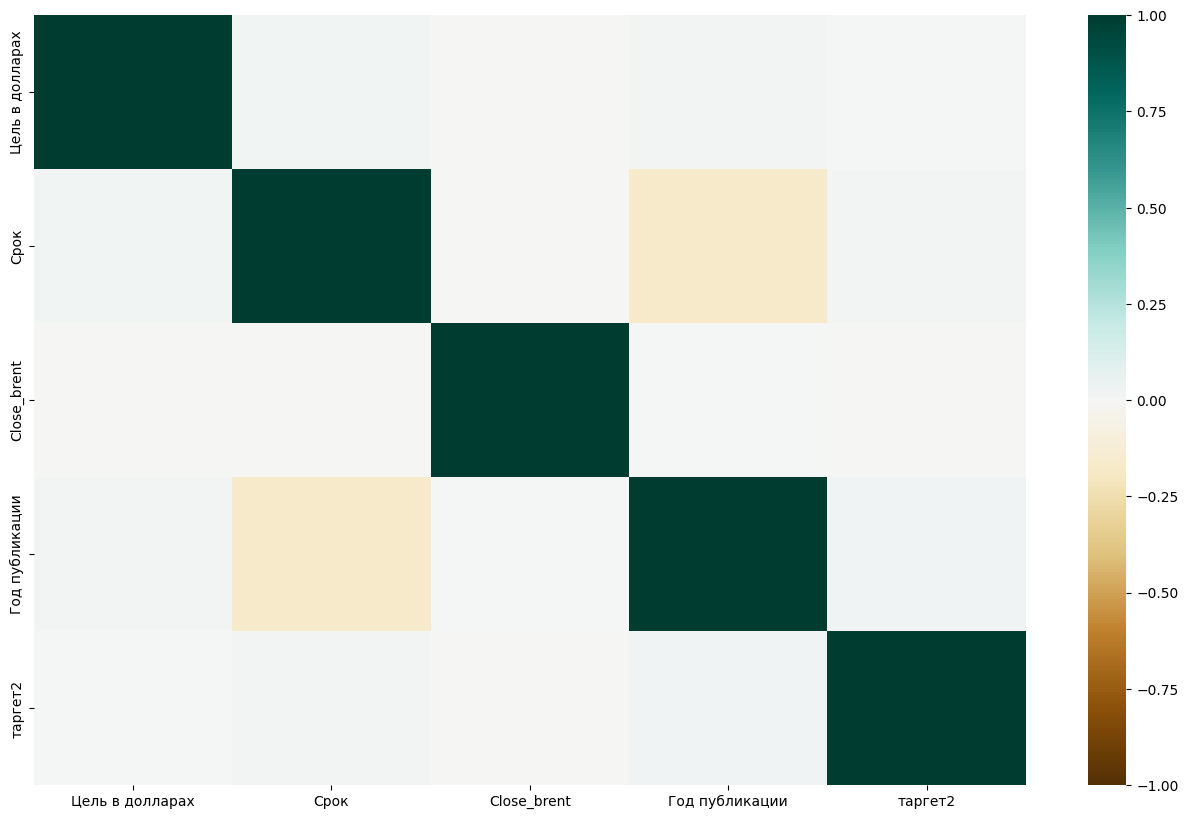

In [10]:
### Тепловая карта

import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(16,10)

sns.heatmap(df, xticklabels=df.columns, yticklabels=df.columns, cmap="BrBG", vmin = -1, vmax = 1)


Либо признаки не подходят,чтобы модель линейной регрессии строить, либо надо строить не линейную регрессию

In [11]:
from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold=1)
variance.fit(X)

VarianceThreshold(threshold=1)

In [12]:
variance.get_feature_names_out()

array(['Категория', 'Цель в долларах', 'Срок', 'Год публикации'],
      dtype=object)

In [4]:
data = pd.read_csv("data/ks_crashed.csv")

In [5]:
data.head(20)

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,600.00
1,Me & You Coordinating Sunglasses- Optical Qual...,NaN,USD,502.00,10000.00
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,1400.00
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,10000.00
4,The Seer and the Sword,Film & Video,USD,0.00,10000.00
5,The Wild World of Ogots - YOU Become an Ogot (...,Publishing,USD,1305.00,1075.00
6,"VIGATAR, the fitness-machine that lets you pla...",Technology,EUR,4395.53,131879.15
7,Escape Room Palm Springs - Real Life Escape Game,Games,NaN,2553.00,7500.00
8,The Grrrl has a new album called 'Through Ruin...,Music,USD,185.00,178.00
9,The Tile House,Art,NaN,7360.00,7000.00


In [6]:
### Сколько потеряем данных, если просто удалим NaN

print(f"Потеряем {data.shape[0] - data.dropna().shape[0]} объектов")
print(f"Это {round(100*(data.shape[0] - data.dropna().shape[0])/data.shape[0], 1)}% объектов")

Потеряем 89785 объектов
Это 27.1% объектов


In [7]:
data.isna().sum()

Название                  3
Главная категория     32906
Валюта                33200
Собрано в долларах        0
Цель в долларах       33143
dtype: int64

In [8]:
### Начнём с категоральных признаков
### Прием 1: заполнить пропуски самым популярным классом
popular_category = data['Главная категория'].value_counts().index[0]
data["Главная категория"] = data['Главная категория'].fillna(popular_category)

In [9]:
data.isna().sum()

Название                  3
Главная категория         0
Валюта                33200
Собрано в долларах        0
Цель в долларах       33143
dtype: int64

In [10]:
### Прием 2:  Новая категория

data["Валюта"] = data["Валюта"].fillna("Неизвестная валюта")

In [11]:
### Вещественные признаки

data["Цель в долларах"].fillna(0)

0           600.00
1         10000.00
2          1400.00
3         10000.00
4         10000.00
            ...   
331670     9000.00
331671     2501.45
331672     1500.00
331673        0.00
331674     4000.00
Name: Цель в долларах, Length: 331675, dtype: float64

In [12]:
# Медиана

data["Цель в долларах"].fillna(data["Цель в долларах"].median())

0           600.00
1         10000.00
2          1400.00
3         10000.00
4         10000.00
            ...   
331670     9000.00
331671     2501.45
331672     1500.00
331673     5000.00
331674     4000.00
Name: Цель в долларах, Length: 331675, dtype: float64

In [13]:
# Среднее

data["Цель в долларах"].fillna(data["Цель в долларах"].mean())

0           600.000000
1         10000.000000
2          1400.000000
3         10000.000000
4         10000.000000
              ...     
331670     9000.000000
331671     2501.450000
331672     1500.000000
331673    42352.372792
331674     4000.000000
Name: Цель в долларах, Length: 331675, dtype: float64

In [14]:
### Значение у наиболее близкого объекта

grouped_means = data.groupby("Главная категория")["Цель в долларах"].transform("mean")

In [15]:
data["Цель в долларах"] = grouped_means

In [16]:
data.isna().sum()

Название              3
Главная категория     0
Валюта                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

In [17]:
### Дропнем названия

data = data[data["Название"].isna() == False]

In [18]:
data.isna().sum()

Название              0
Главная категория     0
Валюта                0
Собрано в долларах    0
Цель в долларах       0
dtype: int64

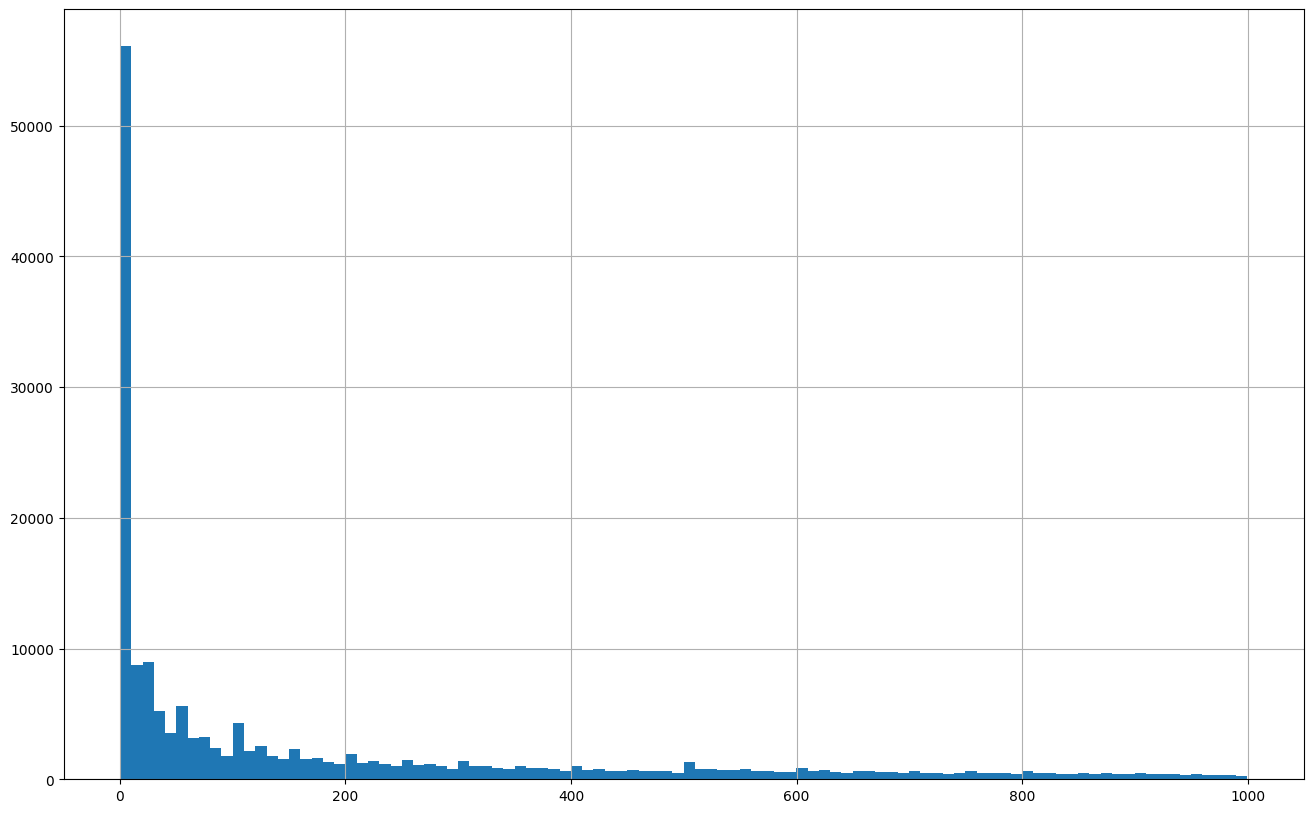

In [19]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,10))

data[data["Собрано в долларах"] < 1000]["Собрано в долларах"].hist(bins=100)

plt.show()

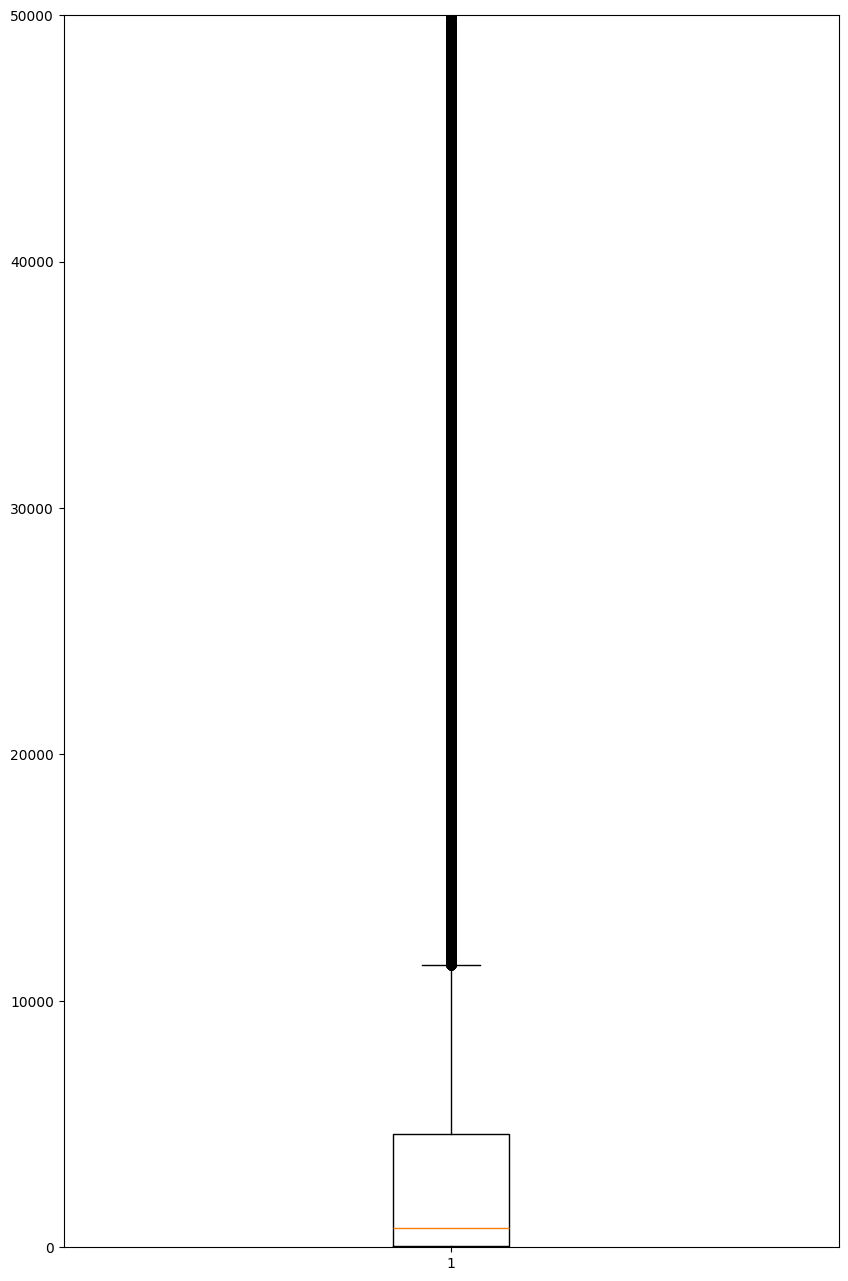

In [20]:
fig = plt.figure(figsize=(10,16))

plt.boxplot(data["Собрано в долларах"].values)
plt.ylim(0, 50000)
plt.show()



In [21]:
### Расчитаем длину усиков

q_low = data["Собрано в долларах"].quantile(0.25)
q_high = data["Собрано в долларах"].quantile(0.75)

box_size = q_high - q_low
box_size

np.float64(4558.0)

In [22]:
### Верхний ус

upper_tentacle = q_high + 3 * box_size
upper_tentacle

np.float64(18282.0)

In [23]:
data[data["Собрано в долларах"]<upper_tentacle]

,Название,Главная категория,Валюта,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,USD,600.00,14706.137908
1,Me & You Coordinating Sunglasses- Optical Qual...,Film & Video,USD,502.00,63850.235173
2,New Carts for Istanbul Street Food Vendors,Food,USD,2414.00,45638.010981
3,New Improv Comedy Venue in Des Moines,Theater,USD,10030.88,23878.837883
4,The Seer and the Sword,Film & Video,USD,0.00,63850.235173
...,...,...,...,...,...
331669,Jared Horgan's Huge Opportunity,Music,USD,505.00,14706.137908
331671,TurnAround//The End Needs A Beginning Album Re...,Music,GBP,0.00,14706.137908
331672,Celtic inspired band looking to move forward w...,Music,USD,0.00,14706.137908
331673,Listening & Speaking in Virtual Reality: 5 Int...,Technology,Неизвестная валюта,200.00,98961.220521


## TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
### Зафитим данные в TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf.fit(data["Название"])

TfidfVectorizer()

In [ ]:
### Посмотрим, как выглядить наш первый документ (первое описание)

first_document = data["Название"][0]
first_document

'Don\'t Call it a Comeback "Telescopes"'

In [30]:
### Вектроизуем описание через tf idf
tfidf.transform([first_document])
tfidf.transform([first_document]).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 135398))

In [ ]:
tfidf.get_feature_names_out()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [34]:
### Посмотрим на содержимое

df = pd.DataFrame(tfidf.transform([first_document]).T.todense(),
                  index = tfidf.get_feature_names_out(),
                  columns = ['tfidf'])

df.sort_values('tfidf', ascending=False)[:50]

,tfidf
telescopes,0.613898
comeback,0.503584
call,0.396683
don,0.361875
it,0.284996
00001,0.000000
00006,0.000000
0001,0.000000
üsica,0.000000
01,0.000000


In [35]:
df[df.values>0]

,tfidf
call,0.396683
comeback,0.503584
don,0.361875
it,0.284996
telescopes,0.613898
